# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [63]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

df= pd.read_excel('Online Retail.xlsx')

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [64]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [65]:
df.count()

print(df.isnull().sum())

df= df.dropna()

print(df.count())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64


In [66]:
masked_df_Quantity = ((df['Quantity'] > 0) & (df['UnitPrice'] > 0))

new_df = df[masked_df_Quantity]

percentage = (new_df.size / df.size) * 100

print(str(percentage) + '%')


new_df

97.80128751883468%


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [67]:
mean_price =new_df['UnitPrice'].mean()
print("Mean Price:", mean_price)

median_price = new_df['UnitPrice'].median()
print("Median Price:", median_price)

mode_price = new_df['UnitPrice'].mode()
print("Mode Price:", mode_price)


new_df['Z-score']=stats.zscore(new_df['Quantity'])
new_df= new_df[(new_df['Z-score'] < 3) | (new_df['Z-score'] > -3)]
new_df

Mean Price: 3.116487755220217
Median Price: 1.95
Mode Price: 0    1.25
dtype: float64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Z-score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,-0.038968
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.038968
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,-0.027816
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.038968
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.038968
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,-0.005511
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,-0.038968
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,-0.050121
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,-0.050121


In [68]:
new_df['Month']=pd.to_datetime(df['InvoiceDate']).dt.month_name()

new_df['Year']=pd.to_datetime(df['InvoiceDate']).dt.year

new_df['Year'].unique()
mask2011= new_df['Year']==2011
mask2010= new_df['Year']==2010


new_df_2011=new_df[mask2011]
new_df_2010=new_df[mask2010]

In [69]:
grouped_df_month2011= new_df_2011.groupby(['Month','Year']).sum().reset_index()

month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
grouped_df_month2011

,Month,Year,Quantity,UnitPrice,CustomerID,Z-score
0,April,2011,292222,79005.481,345925717.0,-10.358912
1,August,2011,398121,79423.830,412055398.0,264.023048
2,December,2011,287413,47173.430,264994057.0,349.433960
3,February,2011,265622,63185.760,305207531.0,37.948625
4,January,2011,349098,66964.990,321863240.0,409.134368
5,July,2011,369420,75919.901,410674538.0,117.160208
6,June,2011,363699,85274.730,416663110.0,59.185102
7,March,2011,348503,88563.100,412653906.0,-24.827542
8,May,2011,373601,102128.280,431128726.0,32.197938
9,November,2011,669051,185522.460,991300319.0,-942.906992


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

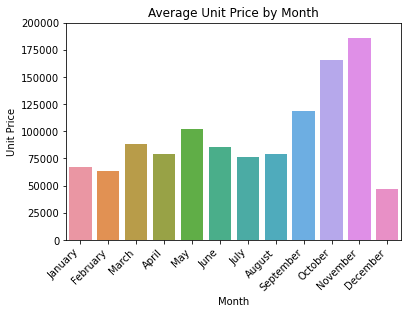

In [70]:
sns.barplot(x='Month', y='UnitPrice', data=grouped_df_month2011, order=month_order)

plt.ylabel('Unit Price')  # Update ylabel to represent the data being plotted

plt.xlabel('Month')

plt.title('Average Unit Price by Month')

plt.ylim(bottom=0,top=200000)

plt.xticks(rotation=45 , ha='right') 


,index,CustomerID,Quantity,UnitPrice,Z-score
0,1653,14646.0,190201,5031.25,915.324690
1,2936,16446.0,80997,4.98,451.443349
2,55,12415.0,77374,2097.08,379.745775
3,1840,14911.0,76944,24728.62,39.119317
4,0,12346.0,74215,1.04,413.769980
5,3636,17450.0,69207,1131.58,361.726248
6,975,13694.0,59452,831.64,293.713739
7,3677,17511.0,58123,2038.14,260.736563
8,4086,18102.0,57429,1757.09,290.327374
9,1304,14156.0,56337,5355.82,212.971069


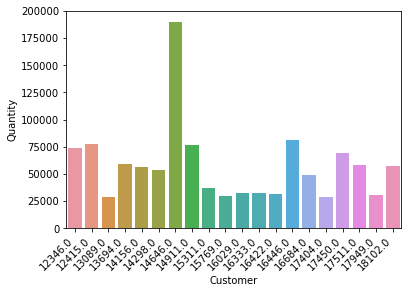

In [72]:
#order = grouped_df_customer.index

sns.barplot(x='CustomerID',y='Quantity',data= grouped_df_customer.head(20))
plt.ylabel('Quantity')

plt.xlabel('Customer')
plt.ylim(bottom=0,top=200000)
plt.xticks(rotation=45 ,ha='right')
plt.show()

In [73]:
grouped_df_products= new_df_2011.groupby(['StockCode','Description']).sum().reset_index()
grouped_df_products= grouped_df_products.sort_values('Quantity', ascending=False)
grouped_df_products

,StockCode,Description,Quantity,UnitPrice,CustomerID,Z-score,Year
2486,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,451.577048,2011
1984,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916,241.62,3047321.0,420.139842,398178
2655,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49276,130.18,6773615.0,242.618895,892884
3488,85099B,JUMBO BAG RED RETROSPOT,44125,3101.19,23465743.0,134.951398,3084874
3495,85123A,WHITE HANGING HEART T-LIGHT HOLDER,33114,5278.97,28249869.0,52.764943,3662031
...,...,...,...,...,...,...,...
3600,90024D,NEW BAROQUE B'FLY NECKLACE PINK,1,8.50,15038.0,-0.066850,2011
410,21310,CAPIZ CHANDELIER,1,29.95,18018.0,-0.066850,2011
2648,82605,OLD DOC RUSSEL METAL SIGN,1,2.10,17673.0,-0.066850,2011
2858,90021,LASER CUT MULTI STRAND NECKLACE,1,11.95,15891.0,-0.066850,2011


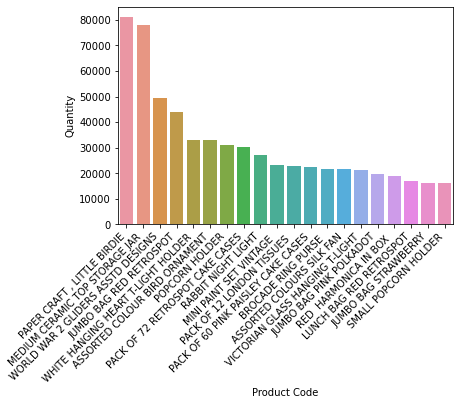

In [74]:
sns.barplot(x='Description',y='Quantity',data= grouped_df_products.head(20))
plt.ylabel('Quantity')

plt.xlabel('Product Code')
#plt.ylim(bottom=0,top=20000)
plt.xticks(rotation=45 ,ha='right')
plt.show()

In [75]:
grouped_df_country= new_df_2011.groupby(['Country']).sum().reset_index()

grouped_df_country.drop('Year', axis=1).head(20)
grouped_df_country=grouped_df_country.sort_values('UnitPrice', ascending=False)

print(grouped_df_country)
print(new_df_2011)

                 Country  Quantity      UnitPrice    CustomerID      Z-score  \
34        United Kingdom   3988973  976283.033999  5.133566e+09 -1684.410855   
13                France    106482   35294.530000  1.002667e+08    21.100603   
14               Germany    112384   31568.770000  1.078885e+08     9.035266   
10                  EIRE    135032   30505.180000  1.017667e+08   253.018472   
28             Singapore      5241   12949.990000  2.829168e+06    13.146662   
29                 Spain     27073    9253.580000  3.094479e+07   -23.507658   
25              Portugal     15138    8173.430000  1.715242e+07   -13.071699   
3                Belgium     21482    7099.500000  2.406893e+07   -20.427127   
31           Switzerland     29368    6243.250000  2.269896e+07    33.976609   
22           Netherlands    193550    6086.040000  3.296957e+07   913.647936   
23                Norway     15754    5423.640000  1.149451e+07    20.926983   
12               Finland      9450    35